# Project Description
This project is an exploratory data analysis of a 12-months sales data. The datasets contains 12 CSV files, one file for each month sales and the objectives of this piece include 
-Merging the files into a single CSV file and loading it in one dataframe
-Cleaning and preprocessing the data in readiness for EDA
-Exploratory data analysis to bring out insights, patterhs and trends that could improve sales and help the business make better data-driven decisions on where to channel adverts and sales promotions.

In [1]:
#importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import warnings
warnings.filterwarnings("ignore")

In [2]:
# List of CSV files for the 12 months
file_paths = glob.glob("Sales_*.csv")

# Using list comprehension to read and concatenate dataframes
combined_data = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)

# Save the combined data to a new CSV file or perform further analysis
combined_data.to_csv("combined_sales_data.csv", index=False)
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
#Checking the basic information about the dataset
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
# Checking for the shape of the dataframe
combined_data.shape

(186850, 6)

In [5]:
#Checking for null values
combined_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
combined_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
#Checking for Duplicates
combined_data.duplicated().sum()

1162

In [8]:
# Statistical Summary of the dataframe
combined_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [9]:
# CLEANING
#Creating a copy of the original DataFrame befire cleaning
sales_data = combined_data.copy()

In [10]:
# Removing null values
sales_data.dropna(inplace = True)

In [11]:
# Removing Duplicates
sales_data.drop_duplicates(inplace = True)

In [12]:
sales_data.shape

(185687, 6)

In [13]:
sales_data['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor',
       'Product'], dtype=object)

In [14]:
sales_data['Purchase Address'].unique()

array(['917 1st St, Dallas, TX 75001',
       '682 Chestnut St, Boston, MA 02215',
       '669 Spruce St, Los Angeles, CA 90001', ...,
       '981 4th St, New York City, NY 10001',
       '840 Highland St, Los Angeles, CA 90001',
       '220 12th St, San Francisco, CA 94016'], dtype=object)

In [15]:
# Changing the data types
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'], errors='coerce')
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'], errors='coerce')


In [16]:
# Standardizing date formats
date_formats = ['%m/%d/%Y %H:%M', '%m/%d/%y %H:%M', '%d/%m/%Y %H:%M', '%d/%m/%y %H:%M']

for format in date_formats:
    converted_dates = pd.to_datetime(sales_data['Order Date'], format=format, errors='coerce')
    if not converted_dates.isnull().all():
        sales_data['Order Date'] = converted_dates
        break  

In [17]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185687 non-null  object        
 1   Product           185687 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185687 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 9.9+ MB


In [18]:
# Extracting the City names from Purchase Address column
def extract_city(purchase_address):
    parts = purchase_address.split(', ')
    return parts[-2] if len(parts) >= 2 else None

# Apply the function to the 'Address' column
sales_data['City'] = sales_data['Purchase Address'].apply(extract_city)
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles


In [19]:
#Dropping the Purchase Address column
sales_data.drop(columns='Purchase Address', inplace=True)
sales_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,Boston
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,Los Angeles


In [20]:
sales_data['Revenue'] = sales_data['Quantity Ordered'] * sales_data['Price Each']
sales_data.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,City,Revenue
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,Dallas,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,Boston,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,Los Angeles,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,Los Angeles,11.99


In [21]:
### Revenue By Month
#Extracting the months from the order date column

sales_data['Month_Year'] = sales_data['Order Date'].dt.to_period('M')

# Group by month and sum the 'Revenue' for each month
monthly_revenue = sales_data.groupby("Month_Year")["Revenue"].sum().reset_index()
monthly_revenue = monthly_revenue.sort_values(by='Revenue', ascending=False)
monthly_revenue


,Month_Year,Revenue
11,2019-12,4608295.70
9,2019-10,3734777.86
3,2019-04,3389217.98
10,2019-11,3197875.05
4,2019-05,3150616.23
2,2019-03,2804973.35
6,2019-07,2646461.32
5,2019-06,2576280.15
7,2019-08,2241083.37
1,2019-02,2200078.08


December, October April, November and May were the best months for sales.

Adverts should be displayed in January to push sales for the month

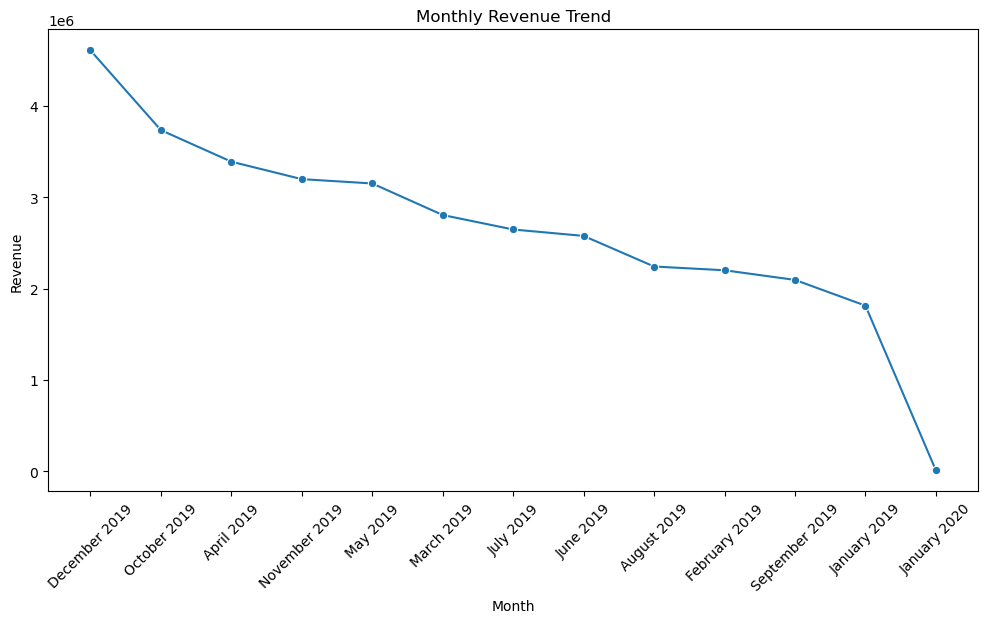

In [22]:
# Convert period to string with month names
monthly_revenue['Month_Year'] = monthly_revenue['Month_Year'].dt.strftime('%B %Y')

# Plotting the line chart using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month_Year', y='Revenue', data=monthly_revenue, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

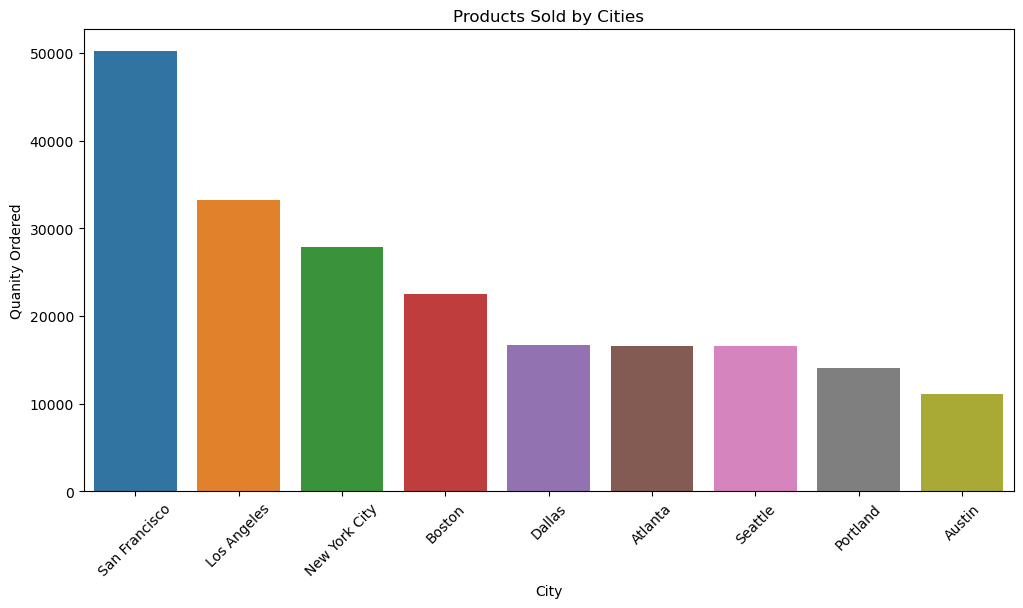

In [33]:
# Products Sold by Cities
sales = sales_data.groupby("City")["Quantity Ordered"].sum().reset_index()
sales  = sales.sort_values(by='Quantity Ordered', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Quantity Ordered', data=sales)
plt.title('Products Sold by Cities')
plt.xlabel('City')
plt.ylabel('Quanity Ordered')
plt.xticks(rotation=45)
plt.show()


San Francisco sold the most products.

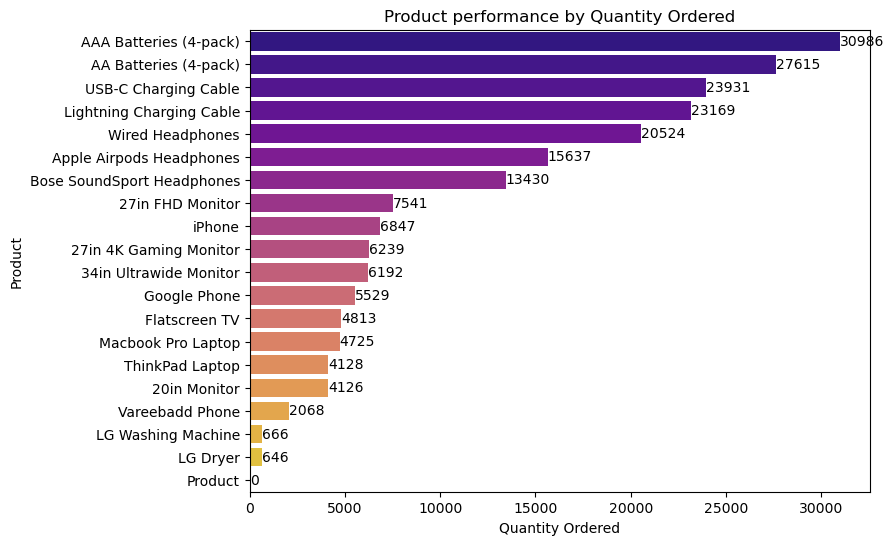

In [25]:
# Product performance By Quantity Oredered

product_performance = sales_data.groupby("Product")["Quantity Ordered"].sum().reset_index()
product_performance = product_performance.sort_values(by='Quantity Ordered', ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Quantity Ordered', y='Product', data=product_performance, palette='plasma', orient='h')

# Display values on top of the bars
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{int(p.get_width())}', ha='left', va='center')


plt.title('Product performance by Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.show()


_AAA Batteries(4 pack) sold the most with 30,986 units sold

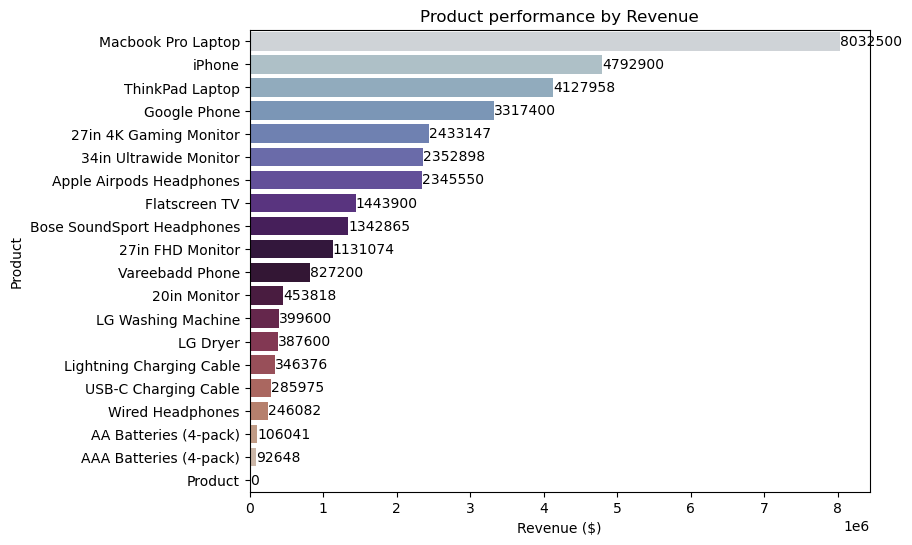

In [34]:
# Product performance By revenue

product_performance = sales_data.groupby("Product")["Revenue"].sum().reset_index()
product_performance = product_performance.sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Revenue', y='Product', data=product_performance, palette='twilight', orient='h')

# Display values on top of the bars
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{int(p.get_width())}', ha='left', va='center')

plt.title('Product performance by Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Product')
plt.show()

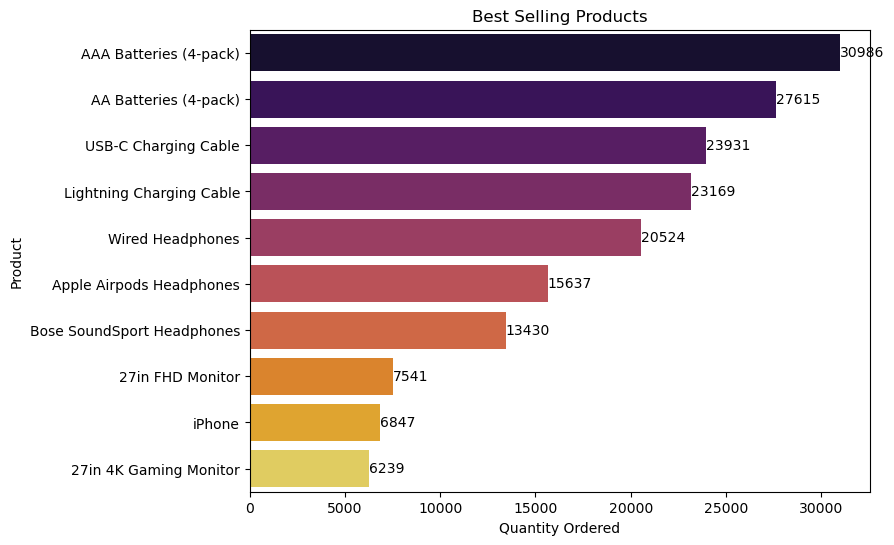

In [28]:
# Best Selling products
product_performance = sales_data.groupby("Product")["Quantity Ordered"].sum().reset_index()
product_performance = product_performance.sort_values(by='Quantity Ordered', ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Quantity Ordered', y='Product', data=product_performance.head(10), palette='inferno', orient='h')

# Display values on top of the bars
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{int(p.get_width())}', ha='left', va='center')

plt.title('Best Selling Products')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.show()

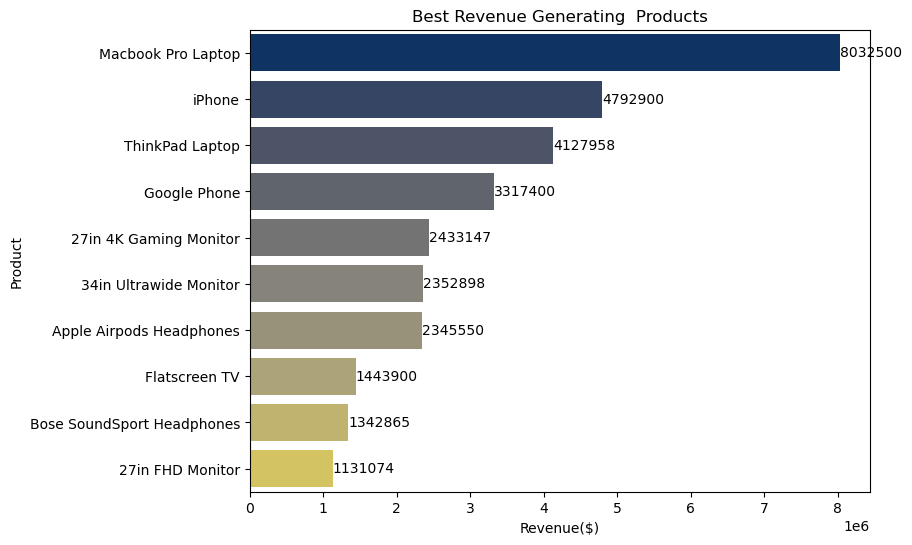

In [29]:
# Best Revenue Generating Products
product_performance = sales_data.groupby("Product")["Revenue"].sum().reset_index()
product_performance = product_performance.sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Revenue', y='Product', data=product_performance.head(10), palette='cividis', orient='h')

# Display values on top of the bars
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{int(p.get_width())}', ha='left', va='center')

plt.title('Best Revenue Generating  Products')
plt.xlabel('Revenue($)')
plt.ylabel('Product')
plt.show()

In [38]:
# Products that are most often sold together
import pandas as pd
from itertools import combinations
from collections import Counter

# Group by order ID and aggregate products as lists
orders = sales_data.groupby('Order ID')['Product'].apply(list).reset_index()

# Function to find combinations of products in each order
def find_product_combinations(products_list):
    product_combinations = []
    for combo in combinations(products_list, 2):
        product_combinations.append(tuple(sorted(combo)))
    return product_combinations

# Applying the function to each order and flatten the list of combinations
all_product_combinations = orders['Product'].apply(find_product_combinations).tolist()

# Counting the occurrences of each product combination
combination_counter = Counter([item for sublist in all_product_combinations for item in sublist])

# Displaying the most common product combinations
most_common_combinations = combination_counter.most_common(10)  # Adjust '10' to the desired number
print("Most Common Product Combinations:")
for combination, count in most_common_combinations:
    print(f"{combination}: {count} times")


Most Common Product Combinations:
('Lightning Charging Cable', 'iPhone'): 1011 times
('Google Phone', 'USB-C Charging Cable'): 997 times
('Wired Headphones', 'iPhone'): 462 times
('Google Phone', 'Wired Headphones'): 422 times
('Apple Airpods Headphones', 'iPhone'): 373 times
('USB-C Charging Cable', 'Vareebadd Phone'): 368 times
('Bose SoundSport Headphones', 'Google Phone'): 228 times
('USB-C Charging Cable', 'Wired Headphones'): 203 times
('Vareebadd Phone', 'Wired Headphones'): 149 times
('Lightning Charging Cable', 'Wired Headphones'): 129 times
